In [ ]:
# The code below works to create a separate dataframe that one can filter down to with the polarity scores.
#First install the required packages using following commands-
#pip install -U textblob
#python -m textblob.download_corpora

import pandas as pd            #Pandas
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #To iterate and slice the tuple read from the file

In [ ]:
#df_survey_data = pd.read_csv(r'C:\Users\Desktop\LearninTxtAnalytics\OnePluseReviewsComments.csv')
#df_survey_data
from google.colab import files
uploaded = files.upload()

Saving OnePluseReviews1.xlsx to OnePluseReviews1 (1).xlsx


In [ ]:
import pandas as pd
import io
#df2= pd.read_csv(io.BytesIO(uploaded['OnePluseReviews1.csv']))
#df2 = pd.read_csv(r'OnePluseReviews1.csv')
df2 = pd.read_excel(io.BytesIO(uploaded['OnePluseReviews1 (1).xlsx']))


COLS = ['text', 'sentiment','subjectivity','polarity'] #create dataframe COLS

df = pd.DataFrame(columns=COLS)

In [ ]:
# find subjectivity and polarity
for index, row in islice(df2.iterrows(), 0, None):
    new_entry = []
    text = (index, row['Comment'])
    text_str = str(text)
    text_lower = text_str.lower()
    blob = TextBlob(text_lower)  #TextBlob Library aims to provide access to common text-processing operations through a familiar interface
    #You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing (https://textblob.readthedocs.io/en/dev/quickstart.html)
    sentiment = blob.sentiment
    #The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity).
    #Subjectivity - In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations (Banfield, 1982; Wiebe, 1994) and thus incorporates sentiment
    #The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
    #Polarity - whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.
    # Polarity is based on or influenced by personal feelings, tastes, or opinions. The polarity score is a float within the range [-1.0, 1.0].
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    #if the polarity is >0, it is considered positive, <0 -is considered negative and ==0 is considered neutral

    # make a new entry with Comment in lower case, sentiment, subjectivity, and polarity
    new_entry += [text_lower,sentiment,subjectivity,polarity] # =+ is a compund operator that adds to the variable and then returns the same

    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df = pd.concat([df,single_survey_sentimet_df], ignore_index=True) # Use concat instead of append
    # df = df.append(single_survey_sentimet_df, ignore_index=True)
#ignore_index : If True, do not use the index labels.

/tmp/ipython-input-1263279161.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,single_survey_sentimet_df], ignore_index=True) # Use concat instead of append


In [ ]:
# Display the first few rows to confirm the changes
print(df.head())

                                                text  \
0  (0, "the same thing happening in the new repla...   
1  (1, "everything is best except the thing that ...   
2  (2, 'do watch the video. m very disappointed w...   
3  (3, 'awesome device, and hats off to amazon fo...   
4  (4, 'worth every buck.finally one plus has inv...   

                                    sentiment  subjectivity  polarity  
0  (-0.07727272727272728, 0.3215909090909091)      0.321591 -0.077273  
1    (0.4166666666666667, 0.3666666666666667)      0.366667  0.416667  
2   (-0.9750000000000001, 0.9750000000000001)      0.975000 -0.975000  
3    (0.3291666666666667, 0.6645833333333333)      0.664583  0.329167  
4   (0.5800000000000001, 0.45999999999999996)      0.460000  0.580000  


In [ ]:
#Convert dataframe to .csv file 'SentimentPolarity_Values.csv'
df.to_csv('SentimentPolarity_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")

df.head()     # Returns the first 5 rows of the dataframe.
#To override the default, you may insert a value between the parenthesis to change the number of rows returned. tail() returns the last 5 rows of the dataframe

,text,sentiment,subjectivity,polarity
0,"(0, ""the same thing happening in the new repla...","(-0.07727272727272728, 0.3215909090909091)",0.321591,-0.077273
1,"(1, ""everything is best except the thing that ...","(0.4166666666666667, 0.3666666666666667)",0.366667,0.416667
2,"(2, 'do watch the video. m very disappointed w...","(-0.9750000000000001, 0.9750000000000001)",0.975000,-0.975000
3,"(3, 'awesome device, and hats off to amazon fo...","(0.3291666666666667, 0.6645833333333333)",0.664583,0.329167
4,"(4, 'worth every buck.finally one plus has inv...","(0.5800000000000001, 0.45999999999999996)",0.460000,0.580000


In [ ]:
df.describe() # describe the dataframe

,subjectivity,polarity
count,1400.000000,1400.000000
mean,0.541302,0.299104
std,0.222256,0.333870
min,0.000000,-1.000000
25%,0.432857,0.067417
50%,0.546375,0.299872
75%,0.660000,0.500000
max,1.000000,1.000000


In [ ]:
#dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(axis=1)]
# Use axis=1 to check for any non-zero value in each row
#df.loc - attribute to access a particular cell in the given Dataframe using the index and column labels
#loc() function is used to access a group of rows and columns by label(s) or a boolean array.
#Returns a cross-section (row(s) or column(s)) from the Series/DataFrame. Access group of values using labels. Single label. Note this returns the row as a Series.

In [ ]:
dffilter.describe()

,subjectivity,polarity
count,1328.000000,1328.000000
mean,0.570650,0.315320
std,0.187931,0.335261
min,0.000000,-1.000000
25%,0.453010,0.123037
50%,0.557143,0.313404
75%,0.666667,0.500000
max,1.000000,1.000000


Text(0, 0.5, 'Range')

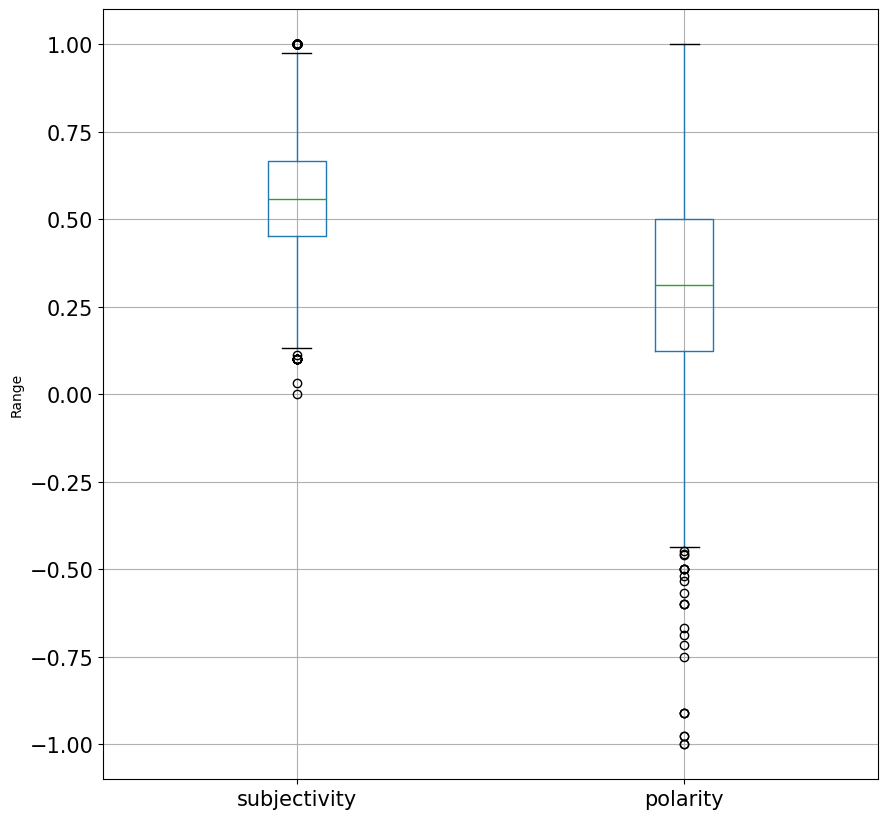

In [ ]:
#boxplot for dffilter i.e. subjectivity and polarity

#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
#pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt
import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
boxplot = dffilter.boxplot(column=['subjectivity','polarity'],
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range') # label y=axis as 'Range'

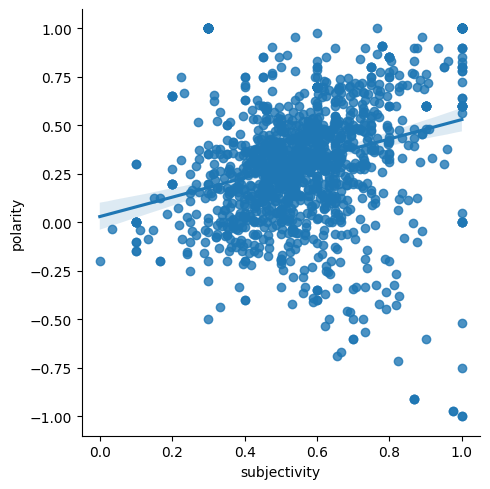

In [ ]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=dffilter,fit_reg=True,scatter=True, palette="mute")
# lmplot is a seaborn function intended as a convenient interface to fit regression models across conditional subsets of a dataset

In [ ]:
# calculate the covariance between two variables

from numpy.random import randn ## Return a sample (or samples) from the “standard normal” distribution. are floats, they are first converted to integers by truncation. A single float randomly sampled from the distribution is returned if no argument is provided.
from numpy.random import seed # seed of last ramdom number generated - NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator
from numpy import cov #Estimate a covariance matrix, given data and weights - https://numpy.org/doc/stable/reference/generated/numpy.cov.html
from scipy.stats import pearsonr #Calculate a Pearson correlation coefficient and the p-value for testing non-correlation

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2)
print("Covariance")  #print(covariance) matrix of subjectivity vs polarity. +ve values indicate same direction

corr, _ = pearsonr(data1, data2)
print('Pearson’s correlation: %.5f' % corr) # float value upto 5 decimal points

Covariance
Pearson’s correlation: 0.65904


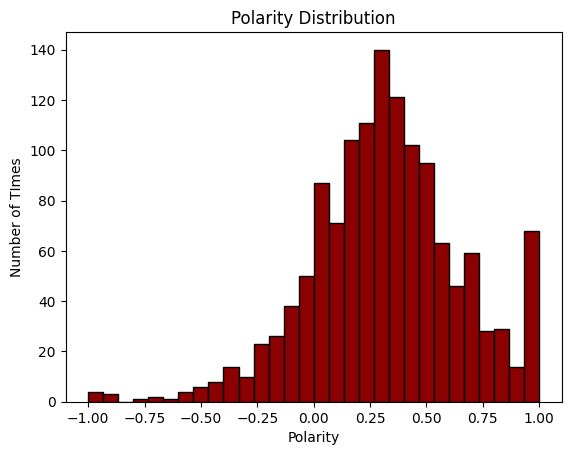

In [ ]:
#Polarity Distribution for dffilter
# plot histogram for polarity
plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
# If density=True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If stacked is also True, the sum of the histograms is normalized to 1.

plt.title('Polarity Distribution')
plt.xlabel("Polarity") # label x-axis as Polarity
plt.ylabel("Number of TImes") # label y-axis as Number of Times

from pylab import rcParams
# rcParams changes the default parameters -> Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt.
rcParams['figure.figsize'] = 5,5

/tmp/ipython-input-2021911788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dffilter['polarity'], hist=True, kde=True,


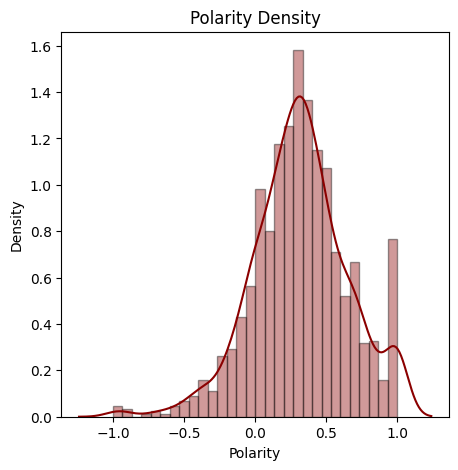

In [ ]:
# plot polarity density
# Seaborn histp


# lets you show a histogram with a line on it. This can be shown in all kinds of variations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions
sns.distplot(dffilter['polarity'], hist=True, kde=True,
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [ ]:
import nltk
nltk.download('all')
stopwords = nltk.corpus.stopwords.words('english')


# REmove stopwords: pandas.Series.str.replace
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# refer to regex: https://docs.python.org/3.1/library/re.html

# exclude stopwords using pandas.Series.str.replace
words = (df.text
           .str.lower()           # convert the sentiments to lower case
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
            # str.replace to perform string or regex substitution on series of string data as above
                     # replace the two character string having '\' and '|' with ' '
                          # replace the two character string having '\' and '&' with ''
                                # replace the two chracter string having '\' and '-' with ''
                                      # replace the two chracter string having '\' and '.' with ''
                                             # replace the two chracter string having '\' and ',' with ''
                                                 # replace the two chracter string having '\' and ''' with ''
                                                         # replace RE_stopwords with ''
           .str.cat(sep=' ') #concatenate strings in pandas with separator put in between
           .split() # string.split() returns a list of strings after breaking the given string by the specified separator
)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
# Word Frequency of words from above
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10), # 10 most common words

                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
phone,1253
camera,781
good,600
one,579
battery,475
oneplus,416
display,405
screen,368
quality,352


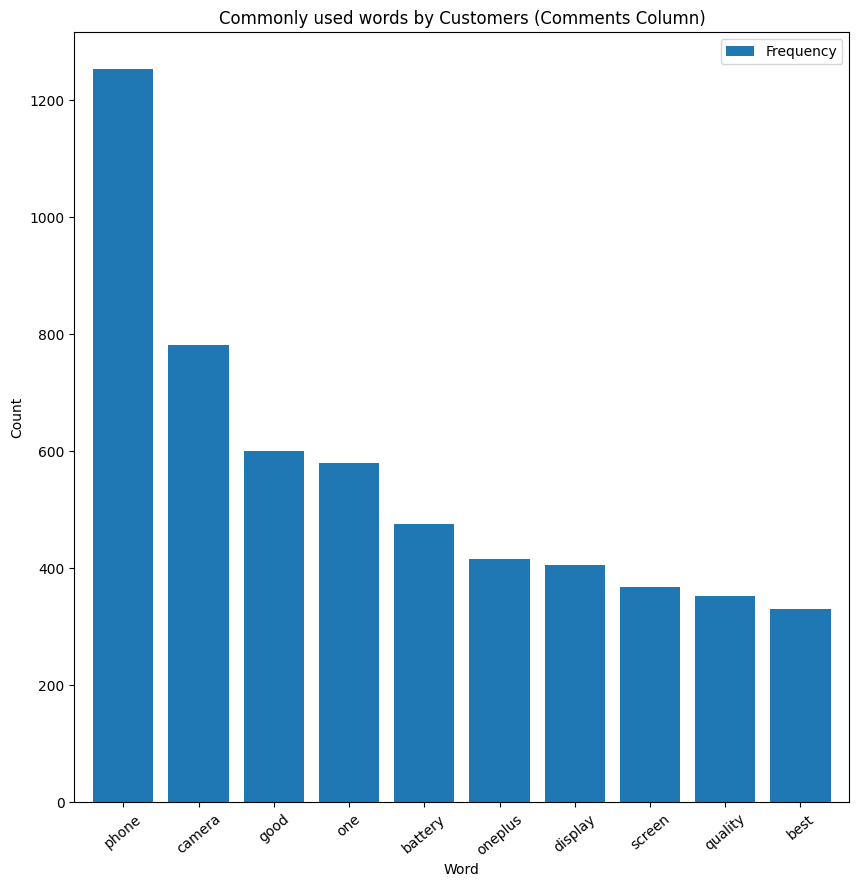

In [ ]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART of 10 commonly used words by customers
rslt.plot.bar(rot=40, figsize=(10,10), width=0.8,colormap='tab10')
plt.title("Commonly used words by Customers (Comments Column)")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

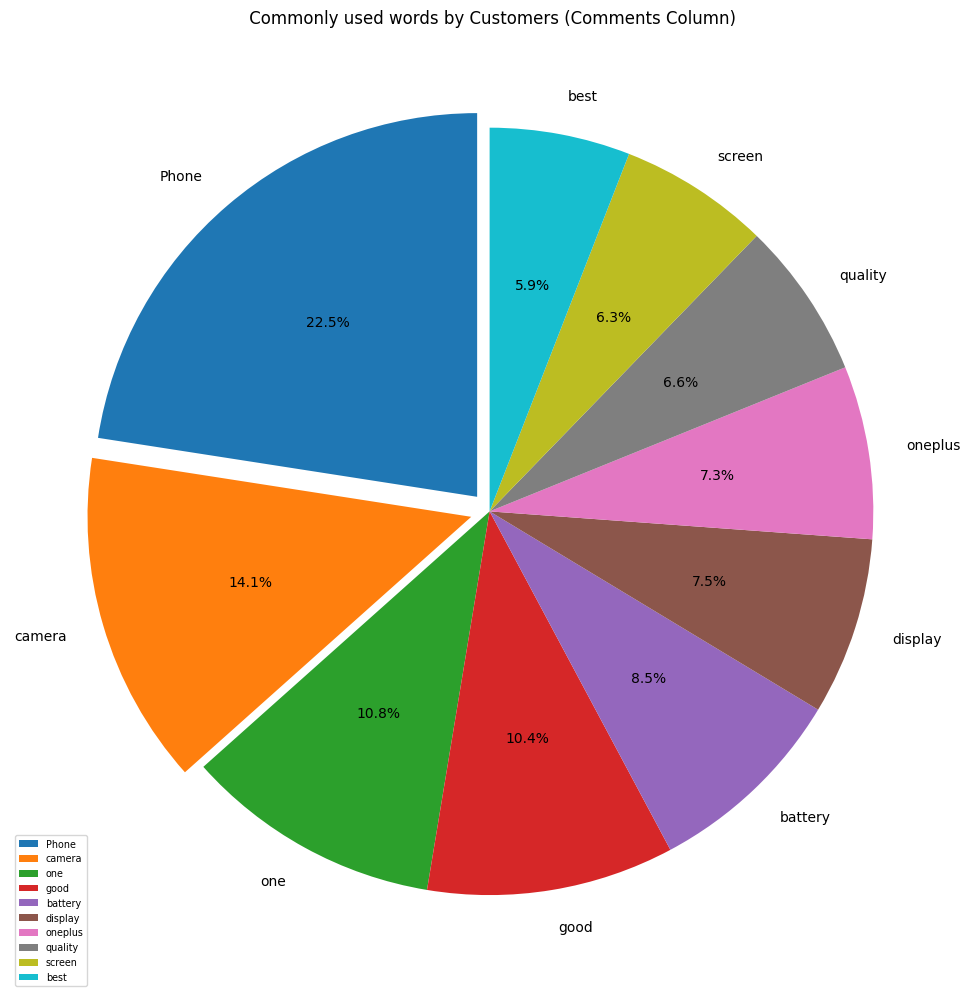

In [ ]:
#PIE CHART

explode = (0.05,0.05,0,0,0,0,0,0,0,0)  # explode 1st and 2nd slice by 0.05 as compared to others
labels=['Phone',
        'camera',
        'one',
        'good',
        'battery',
        'display',
        'oneplus',
        'quality',
        'screen',
        'best',]

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, radius = 1, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commonly used words by Customers (Comments Column)')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 18.0     # matplotlib helps set runtime configuration parameters. here set fontsize to 18

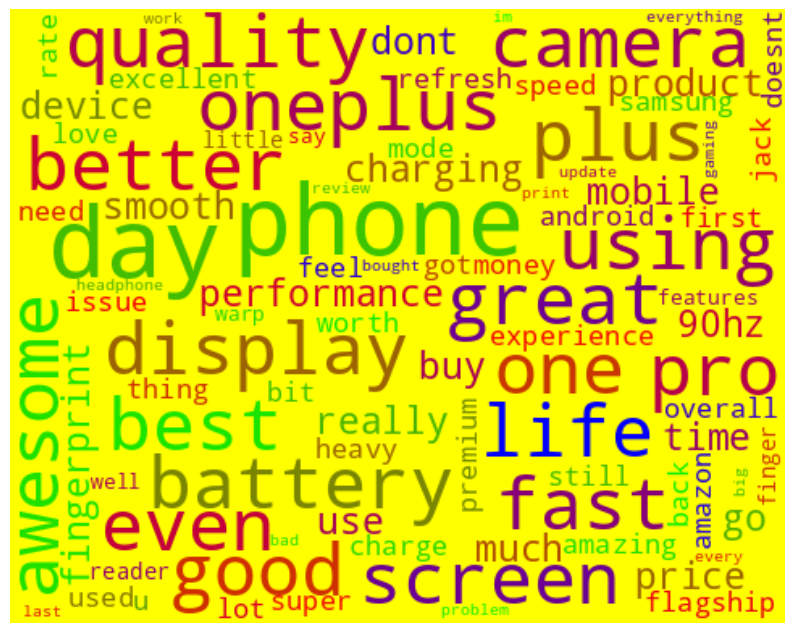

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# draw Word Cloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=150, width=480, height=380,colormap="brg",
                      background_color="yellow").generate(' '.join(rslt_wordcloud['Word']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

In [ ]:
print("SYLLABUS with Lexicon based Text Analytics IS COMPLETE. There will be a REDX guest session for Machine learning based Text Analytics (Classification and Topic modelling using LDA)")

SYLLABUS with Lexicon based Text Analytics IS COMPLETE. There will be a REDX guest session for Machine learning based Text Analytics (Classification and Topic modelling using LDA)


**Summary of Text Analysis:**

The analysis performed on the provided dataset focused on sentiment analysis and word frequency.

- **Sentiment Analysis:**
    - Subjectivity and polarity scores were calculated for each comment using TextBlob.
    - The distribution of polarity scores was visualized using a histogram and a density plot.
    - A boxplot showed the distribution of subjectivity and polarity scores.
    - The correlation between subjectivity and polarity was calculated (Pearson's correlation: 0.65904).

- **Word Frequency Analysis:**
    - Stopwords were removed from the comments.
    - The most frequent words were identified and presented in a table and visualized using a bar chart and a word cloud.
    - The most common words were 'phone', 'camera', 'good', 'one', 'battery', 'oneplus', 'display', 'screen', 'quality', and 'best'.

This analysis provides insights into the sentiment expressed in the comments and highlights the most frequently discussed topics.